# Image Processing Class 1

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

In [93]:
img=cv.imread('lena.tiff') #reading the img using cv2

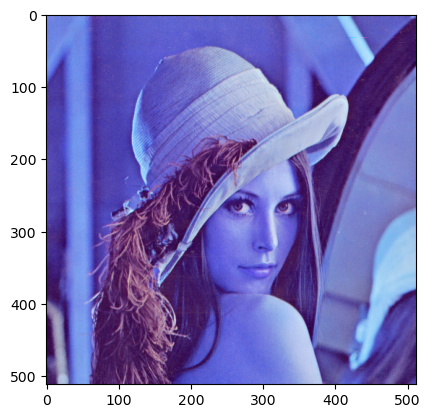

In [94]:
plt.imshow(img)

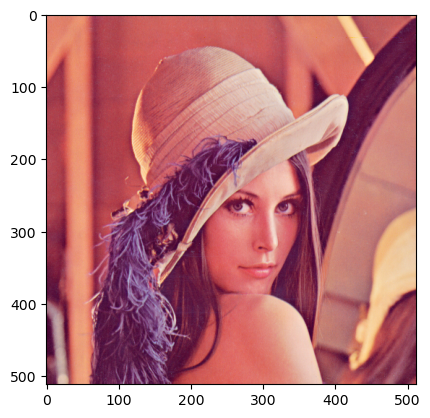

In [95]:
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)) #Here we convert the color from BGR in RGB it's used in plt

In [96]:
type(img)

numpy.ndarray

In [97]:
print(img.size)
print(img.ndim)
print(img.shape)
print(img.dtype)

786432
3
(512, 512, 3)
uint8


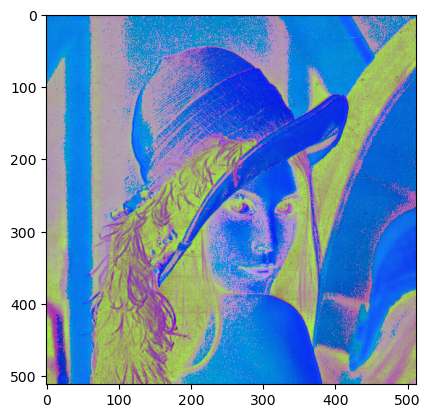

In [98]:
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2HSV))

# For black and white Image

In [99]:
img_b_w=cv.imread('lena.tiff',0)

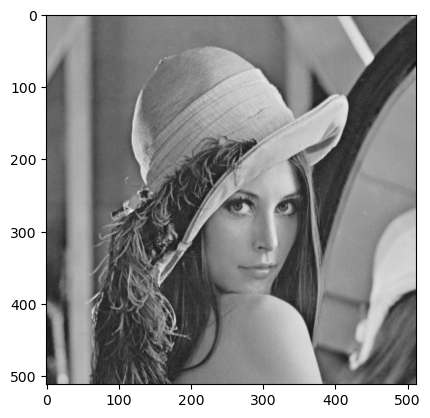

In [100]:
plt.imshow(cv.cvtColor(img_b_w,cv.COLOR_BGR2RGB)) 

# Manually count the frqy of all pixcel of b_w image the plot

In [101]:
arr_img=img_b_w.flatten() #it's used to convert the img pixcel values into an array

In [102]:
print(arr_img)

[162 162 162 ... 104 105 108]


In [103]:
unique_elements, counts = np.unique(arr_img, return_counts=True)

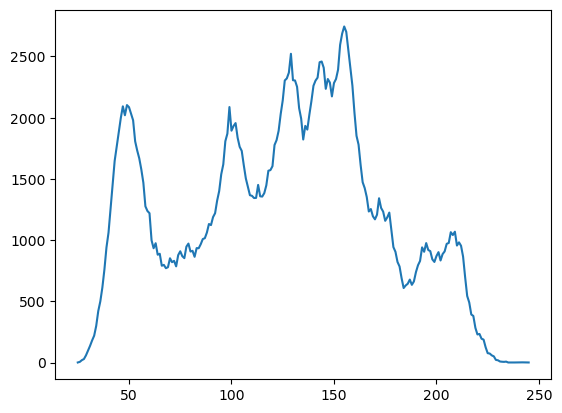

In [104]:
plt.plot(unique_elements,counts)

# Historogram plot of an image using function

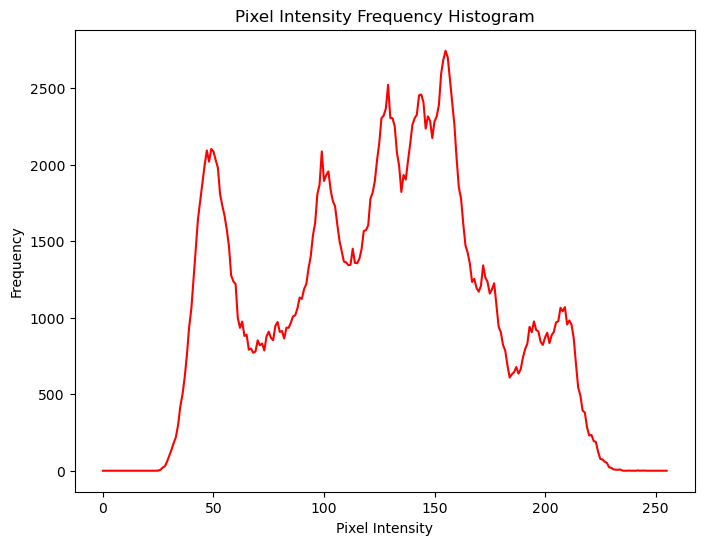

In [106]:
histogram = cv.calcHist([img_b_w], [0], None, [256], [0, 256])

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.plot(histogram, color='red')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Pixel Intensity Frequency Histogram')
plt.show()

# Entropy of an single image 

Entropy of the image is: 6.9684267


C:\Users\Subhadip Bardhan\AppData\Local\Temp\ipykernel_8968\3752880712.py:6: RuntimeWarning: divide by zero encountered in log2
  logs = np.where(hist != 0, np.log2(hist), 0)


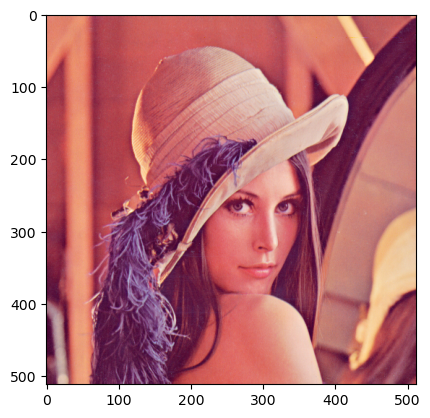

In [18]:
ex_img=cv.imread('lena.tiff')
plt.imshow(cv.cvtColor(ex_img,cv.COLOR_BGR2RGB))

hist = cv.calcHist([ex_img], [0], None, [256], [0,256])
hist = hist.ravel() / hist.sum()
logs = np.where(hist != 0, np.log2(hist), 0)

print("Entropy of the image is:",-np.sum(hist*logs))

# Entropy of multiple image 

In [9]:
# Function to calculate entropy of an image
def entropy(image):
    hist = cv.calcHist([image], [0], None, [256], [0,256])
    hist = hist.ravel() / hist.sum()
    logs = np.where(hist != 0, np.log2(hist), 0)
    return -np.sum(hist * logs)


In [10]:
# Directory containing images
image_dir = "C:/Users/Subhadip Bardhan/Downloads/DIP programs/Entropy"

In [19]:
# List to store (image, entropy) tuples
image_entropy = []

# Iterate over images in directory
for filename in os.listdir(image_dir):
    if filename.endswith(".tiff"): # Adjust file extensions as needed
        image_path = os.path.join(image_dir, filename)
        img = cv.imread(image_path, cv.IMREAD_COLOR) # Read image in colorscale
        ent = entropy(img)
        image_entropy.append((filename, ent))

# Sort images based on entropy
sorted_images = sorted(image_entropy, key=lambda x: x[1])

# Display sorted list
for img_ent in sorted_images:
    print(f"Image: {img_ent[0]}, Entropy: {img_ent[1]}")


Image: girl.tiff, Entropy: 5.7116570472717285
Image: airplane.tiff, Entropy: 6.213773727416992
Image: lena.tiff, Entropy: 6.968426704406738
Image: peeper.tiff, Entropy: 7.058305740356445
Image: elaine.tiff, Entropy: 7.505983352661133


C:\Users\Subhadip Bardhan\AppData\Local\Temp\ipykernel_8968\3273880668.py:5: RuntimeWarning: divide by zero encountered in log2
  logs = np.where(hist != 0, np.log2(hist), 0)


In [20]:
print(sorted_images)

[('girl.tiff', 5.711657), ('airplane.tiff', 6.2137737), ('lena.tiff', 6.9684267), ('peeper.tiff', 7.0583057), ('elaine.tiff', 7.5059834)]


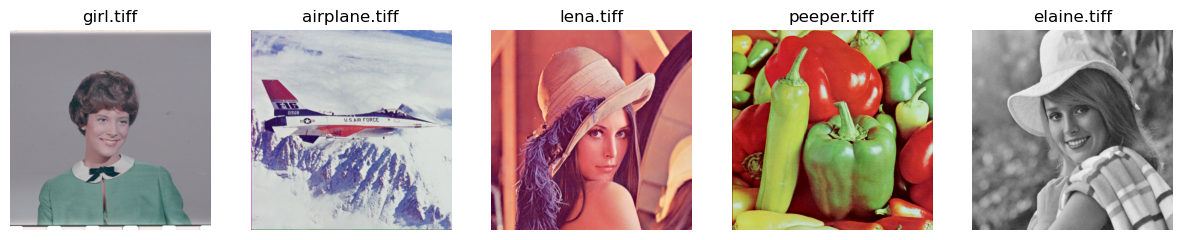

In [61]:
fig, axes = plt.subplots(1, len(image_entropy), figsize=(15, 5))

# Sort axes based on entropy
sorted_axes = [axes[i] for i in np.argsort([x[1] for x in sorted_images])]

# Loop through the sorted images and their entropy values
for ax, (filename, _) in zip(sorted_axes, sorted_images):
    # Read the image
    img = cv.imread(filename)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # Convert BGR to RGB

    # Display the image
    ax.imshow(img)
    ax.set_title(filename)
    ax.axis('off')

plt.show()

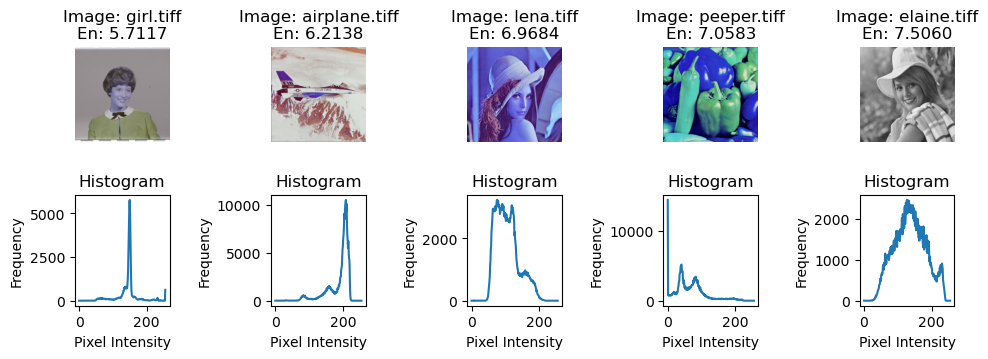

In [58]:
fig, axes = plt.subplots(2, len(sorted_images), figsize=(10, 4))

# Loop through the sorted images and their indices
for idx, (filename, entropy) in enumerate(sorted_images):
    # Read the image
    img = cv.imread(filename, cv.IMREAD_COLOR)
    
    # Calculate the histogram
    hist = cv.calcHist([img], [0], None, [256], [0, 256])
    
    # Plot the image
    axes[0, idx].imshow(img, cmap='gray')
    axes[0, idx].set_title(f'Image: {filename}\nEn: {entropy:.4f}')  # Format entropy to 4 decimal points
    axes[0, idx].axis('off')
    
    # Plot the histogram
    axes[1, idx].plot(hist)
    axes[1, idx].set_title('Histogram')
    axes[1, idx].set_xlabel('Pixel Intensity')
    axes[1, idx].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout(pad=2.0)
plt.show()